### Made By: KUNAL ANAND
EMAIL: kunalanand2907@gmail.com

No : 7042939501

<B>In this Project I have trained my Model on 5 Yoga Pose Classes that are: Warrior, Tree, Plank, Downdog, Goddess.
I have trained my Model by splitting Train in 70% and Test into 30% of the Numeric Data points that i Have Saved in Coordinates.csv Folder.
I have used Logistic Regression, Random Forest Classifier, Gradient Boost, Ridge Classifier as Classification Algorithms.
I have Got highest accuracy of 92.98% with Gradient Boost Classifier.</B>

# YOGA POSE CLASSIFICATION 

<B>1.) Setup Media Pipe - Prebuild Ml Library does pose and landmarks estimation</B>

<B>2.) Whole of Body Estimation</B>

<B>3.) Collecting Join Coordinates</B>

<B>4.) Training an Pose Classification Model</B>

<B>5.) Detecting poses and Body Languages</B>

## 1.) Install and Import Dependencies

In [2]:
!pip install mediapipe opencv-python pandas scikit-learn

Mediapipe - Holistic Model provides face and pose models

Opencv - Used for Image Processing

Pandas - Working with tabular data and dataframes

Scikit-Learn - Building custom Ml Models

In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

## 2.) Make Some Detections

## 1.) Class - Warrior2

the glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules. It is also predicted that according to benchmarks it is faster than other methods to match pathnames in directories. With glob, we can also use wildcards ("*, ?, [ranges]) apart from exact string search to make path retrieval more simple and convenient.

### Detection on 1 image

In [10]:
#Reading, Showing & taking All the Coco names in a list
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000136.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    result = holistic.process(image)
    print(result.face_landmarks)

landmark {
  x: 0.45774829387664795
  y: 0.215341717004776
  z: -0.0031039929017424583
}
landmark {
  x: 0.45296621322631836
  y: 0.20577895641326904
  z: -0.0067619276233017445
}
landmark {
  x: 0.4580199122428894
  y: 0.20887278020381927
  z: -0.0034498674795031548
}
landmark {
  x: 0.4554806053638458
  y: 0.1950865387916565
  z: -0.0037240067031234503
}
landmark {
  x: 0.45270901918411255
  y: 0.20249058306217194
  z: -0.0072425007820129395
}
landmark {
  x: 0.454252153635025
  y: 0.19831956923007965
  z: -0.006885646842420101
}
landmark {
  x: 0.45960110425949097
  y: 0.18762871623039246
  z: -0.00405323039740324
}
landmark {
  x: 0.45797938108444214
  y: 0.18457064032554626
  z: 0.013486295007169247
}
landmark {
  x: 0.4610108435153961
  y: 0.17901897430419922
  z: -0.0033407153096050024
}
landmark {
  x: 0.4607499837875366
  y: 0.17460030317306519
  z: -0.0037172886077314615
}
landmark {
  x: 0.46288761496543884
  y: 0.15640217065811157
  z: -0.0031972823198884726
}
landmark {
  

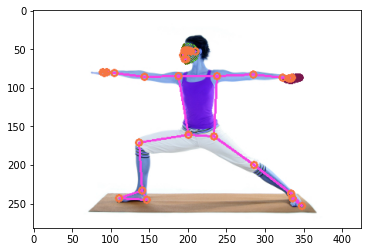

In [15]:
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000136.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    plt.imshow(image)
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()
    
    

<B>We get 3 landmark points as x,y,z for Face, Right and Left Hand and 4 Landmark Points for Pose as x,y,z,Visibility</B>

In [17]:
results.left_hand_landmarks.landmark[0]

x: 0.7615518569946289
y: 0.3111182451248169
z: -6.754798505426152e-06

In [18]:
results.face_landmarks.landmark[0]

x: 0.45774829387664795
y: 0.215341717004776
z: -0.0031039929017424583

In [3]:
# Getting all the images present in Warrior2 Class
images = glob.glob(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\*.*")
print(images)

['C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000118.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000120.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000121.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000122.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000123.png', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000124.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000125.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000126.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000127.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000129.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000131.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\00000132.jpg', 'C:\\Users\\KUNAL\\Documents\\Pose_Detection\\Train\\warrior2\\

In [4]:
# Total Number of Images present in the Directory
len(images)

242

In [5]:
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
         cv2.imshow('Raw Webcam Feed', image)
         cv2.waitKey(100) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         cv2.destroyAllWindows()

C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000118.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000120.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000121.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000122.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000123.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000124.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000125.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000126.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000127.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000129.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000131.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000132.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000134.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000135.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\wa

C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000279.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000281.PNG
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000283.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000284.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000285.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000286.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000287.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000289.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000290.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000291.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000293.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000294.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000295.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000296.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\wa

## 3.) Capture Landmarks & Export to CSV
<!--<img src ="https://i.imgur.com/8bForKY.png">-->
<img src="https://i.imgur.com/AzKNp7A.png">-->

In [6]:
import csv
import os
len(results.pose_landmarks.landmark)

33

In [17]:
# Adding Pose, face, Right hand and Left Hand Landmarks in coords
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)+len(results.right_hand_landmarks.landmark)+len(results.left_hand_landmarks.landmark)
num_coords
# 4 coordinates - x,y,z,Visibility for pose and 3 coordinates for face

In [18]:
# Column 1 - Class having the 5 different Classes we need to classify
landmarks = ['Class']
for val in range(1,num_coords+1):
    landmarks += ['x{}'.format(val),'y{}'.format(val),'z{}'.format(val), 'v{}'.format(val)]
landmarks

['Class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

### Exporting to CSV with Columns and Rows

In [19]:
with open('coordinates.csv',mode ='w',newline="") as f:
     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
     csv_writer.writerow(landmarks)

In [21]:
class_name = "warrior2"
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export Co-ordinates
         try:
            pose = results.pose_landmarks.landmark
            # Extracting into array
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordinates.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
                
        
         except:
            pass
            cv2.imshow('Raw Webcam Feed', image)
        
         #cv2.imshow('Raw Webcam Feed', image)
         #cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         #cv2.destroyAllWindows()
    
    

C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000118.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000120.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000121.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000122.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000123.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000124.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000125.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000126.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000127.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000129.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000131.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000132.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000134.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000135.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\wa

C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000279.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000281.PNG
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000283.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000284.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000285.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000286.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000287.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000289.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000290.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000291.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000293.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000294.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000295.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\warrior2\00000296.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\wa

In [22]:
# Warrior2 class and its 4 Points - x,y,z,Visibility
row

['warrior2',
 0.35829463601112366,
 0.5744509696960449,
 0.13471920788288116,
 0.9991286396980286,
 0.3551439642906189,
 0.5667514204978943,
 0.11825388669967651,
 0.9998000264167786,
 0.353331983089447,
 0.566673994064331,
 0.11815948784351349,
 0.9996991157531738,
 0.3515046238899231,
 0.5666415095329285,
 0.11804255843162537,
 0.9998542070388794,
 0.35976943373680115,
 0.5668630599975586,
 0.10784637182950974,
 0.9998393058776855,
 0.36087554693222046,
 0.56696617603302,
 0.10783995687961578,
 0.9997736811637878,
 0.36200860142707825,
 0.5671036839485168,
 0.10780520737171173,
 0.9998290538787842,
 0.3458622694015503,
 0.5713935494422913,
 0.05771336331963539,
 0.9996819496154785,
 0.3599074184894562,
 0.5715006589889526,
 0.01273350976407528,
 0.9995667338371277,
 0.35499584674835205,
 0.5829485058784485,
 0.11746476590633392,
 0.9987909197807312,
 0.35918015241622925,
 0.582543134689331,
 0.10344761610031128,
 0.9985262155532837,
 0.3134807348251343,
 0.6135242581367493,
 0.032046

## 2.) Class Downdog

### With 1 image

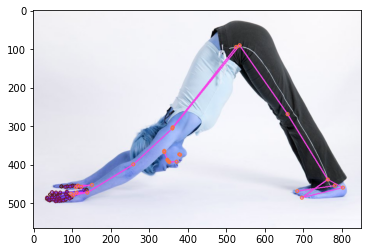

In [3]:
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000128.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    result = holistic.process(image)
    #print(result.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    plt.imshow(image)
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()

In [6]:
result.left_hand_landmarks.landmark[0]

x: 0.15891467034816742
y: 0.8330143690109253
z: -7.201802873169072e-06

In [7]:
result.pose_landmarks.landmark[0]

x: 0.43644818663597107
y: 0.6957447528839111
z: -0.07945992797613144
visibility: 0.9993932247161865

In [23]:
# Getting all the images present in Downdog Class
images = glob.glob(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\*.*")
#print(images)
len(images)

228

In [8]:
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
         cv2.imshow('Raw Webcam Feed', image)
         cv2.waitKey(100) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         cv2.destroyAllWindows()

C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000128.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000129.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000130.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000131.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000132.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000133.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000134.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000135(1).jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000135.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000137(1).jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000137.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000138.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000139.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000140.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00

C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000284.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000285.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000286.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000287.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000288.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000289.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000290.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000291.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000292.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000293.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000294.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000295.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000297.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000298.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000299

In [12]:
results.pose_landmarks.landmark[0]

x: 0.5638363361358643
y: 0.7552155256271362
z: -0.1079554408788681
visibility: 0.9995490908622742

In [16]:
import csv
import os
len(results.pose_landmarks.landmark)

33

In [24]:
class_name = "downdog"
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export Co-ordinates
         try:
            pose = results.pose_landmarks.landmark
            # Extracting into array
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordinates.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
        
         except:
            pass
            cv2.imshow('Raw Webcam Feed', image)
        
         #cv2.imshow('Raw Webcam Feed', image)
         #cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         #cv2.destroyAllWindows()
    
    

C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000128.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000129.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000130.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000131.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000132.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000133.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000134.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000135(1).jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000135.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000137(1).jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000137.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000138.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000139.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000140.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00

C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000284.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000285.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000286.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000287.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000288.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000289.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000290.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000291.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000292.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000293.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000294.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000295.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000297.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000298.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\downdog\00000299

In [25]:
row

['downdog',
 0.5638363361358643,
 0.7552155256271362,
 -0.1079554408788681,
 0.9995490908622742,
 0.5911035537719727,
 0.7685602307319641,
 -0.08449092507362366,
 0.999735414981842,
 0.595075786113739,
 0.7674591541290283,
 -0.08455240726470947,
 0.9994476437568665,
 0.5995485782623291,
 0.7662778496742249,
 -0.0843631699681282,
 0.9996877908706665,
 0.5916575789451599,
 0.7678359150886536,
 -0.15938909351825714,
 0.9997515082359314,
 0.596351146697998,
 0.7660921812057495,
 -0.1594519019126892,
 0.9994820952415466,
 0.6017149686813354,
 0.7640620470046997,
 -0.1592741310596466,
 0.9997465014457703,
 0.6291547417640686,
 0.7397628426551819,
 0.046087596565485,
 0.9992989301681519,
 0.6307686567306519,
 0.7364174127578735,
 -0.30013370513916016,
 0.9993060827255249,
 0.5663120746612549,
 0.723425030708313,
 -0.051654379814863205,
 0.9993311166763306,
 0.568200945854187,
 0.723518967628479,
 -0.1519036740064621,
 0.9996354579925537,
 0.6308614015579224,
 0.6243137717247009,
 0.1607875823

## 3.) Class - Goddess

## With 1 image

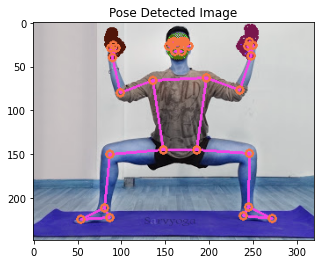

In [28]:
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000154.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    result = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    plt.imshow(image)
    plt.title("Pose Detected Image")
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()

In [30]:
result.left_hand_landmarks.landmark[0]

x: 0.7725503444671631
y: 0.15434867143630981
z: 2.1143397077594273e-07

In [31]:
# Getting all the images present in Downdog Class
images = glob.glob(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\*.*")
#print(images)
len(images)

146

In [32]:
class_name = "goddess"
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export Co-ordinates
         try:
            pose = results.pose_landmarks.landmark
            # Extracting into array
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordinates.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
        
         except:
            pass
            cv2.imshow('Raw Webcam Feed', image)
        
         #cv2.imshow('Raw Webcam Feed', image)
         #cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         #cv2.destroyAllWindows()
    
    

C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000096.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000097.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000101.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000102.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000103.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000104.jpeg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000105.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000106.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000107.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000108.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000111.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000112.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000113.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000114.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\0000011

C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000339.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000343.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000346.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000348.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000349.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000355.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000357.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000358.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000360.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000361.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000363.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000366.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000369.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000370.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\goddess\00000374

In [33]:
row

['goddess',
 0.46039462089538574,
 0.36641788482666016,
 -0.5848127007484436,
 0.9999949932098389,
 0.4693926274776459,
 0.3562234044075012,
 -0.547329843044281,
 0.9999942779541016,
 0.474784255027771,
 0.3561254143714905,
 -0.547433614730835,
 0.999982476234436,
 0.4804527759552002,
 0.35614335536956787,
 -0.5474135875701904,
 0.9999922513961792,
 0.4512048363685608,
 0.3566901683807373,
 -0.5444891452789307,
 0.9999938011169434,
 0.4451732635498047,
 0.3567095398902893,
 -0.5445501804351807,
 0.9999852180480957,
 0.440041720867157,
 0.3567054271697998,
 -0.5443195700645447,
 0.9999936819076538,
 0.49275052547454834,
 0.36071038246154785,
 -0.3354009985923767,
 0.9999827146530151,
 0.43436387181282043,
 0.36085575819015503,
 -0.3180115520954132,
 0.9999867677688599,
 0.4732772409915924,
 0.3780040442943573,
 -0.5091131329536438,
 0.9999946355819702,
 0.45003998279571533,
 0.37785863876342773,
 -0.5043954849243164,
 0.999996542930603,
 0.542665421962738,
 0.42167145013809204,
 -0.1709

## 4.) Class - Plank 

## With 1 image

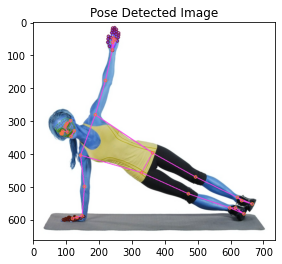

In [34]:
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000168.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    result= holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    plt.imshow(image)
    plt.title("Pose Detected Image")
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()

In [ ]:
result.left_hand_landmarks.landmark[0]

In [ ]:
result.right_hand_landmarks.landmark[0]

In [ ]:
result.face_landmarks.landmark[0]

In [35]:
# Getting all the images present in Downdog Class
images = glob.glob(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\*.*")
#print(images)
len(images)

239

In [36]:
class_name = "plank"
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export Co-ordinates
         try:
            pose = results.pose_landmarks.landmark
            # Extracting into array
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordinates.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
        
         except:
            pass
            cv2.imshow('Raw Webcam Feed', image)
        
         #cv2.imshow('Raw Webcam Feed', image)
         #cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         #cv2.destroyAllWindows()
    
    

C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000128.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000129.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000136.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000137.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000138.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000140.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000144.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000146.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000149.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000150.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000151.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000153.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000154.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000155.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000156.jpg
C:\Users\KUNAL\Documents\

C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000297.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000299.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000301.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000302.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000303.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000304.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000305.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000306.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000307.png
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000308.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000309.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000310.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000311.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000312.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\plank\00000313.jpg
C:\Users\KUNAL\Documents\

In [37]:
row

['plank',
 0.22370311617851257,
 0.47404804825782776,
 -0.1740044802427292,
 0.9999842643737793,
 0.21872177720069885,
 0.44579020142555237,
 -0.15504944324493408,
 0.999975323677063,
 0.22263655066490173,
 0.43595457077026367,
 -0.15511831641197205,
 0.9999459981918335,
 0.22598928213119507,
 0.42897921800613403,
 -0.15502457320690155,
 0.9999657869338989,
 0.20853734016418457,
 0.47318774461746216,
 -0.15978792309761047,
 0.9999797344207764,
 0.20582681894302368,
 0.4813946783542633,
 -0.15983878076076508,
 0.9999681711196899,
 0.20269301533699036,
 0.4919469356536865,
 -0.15974228084087372,
 0.9999837875366211,
 0.23810604214668274,
 0.42086100578308105,
 -0.025539018213748932,
 0.9999204874038696,
 0.20481619238853455,
 0.5066543817520142,
 -0.050516486167907715,
 0.9999442100524902,
 0.24499750137329102,
 0.4748459756374359,
 -0.12335404008626938,
 0.9999918937683105,
 0.23301999270915985,
 0.506725013256073,
 -0.131011962890625,
 0.9999943971633911,
 0.3277183473110199,
 0.441313

## 5.) Class - Tree

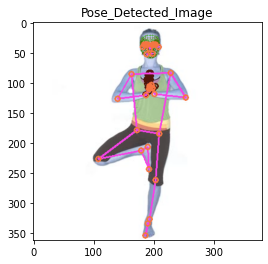

In [42]:
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000083.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    result = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Pose Detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    plt.imshow(image)
    plt.title("Pose_Detected_Image")
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()

In [49]:
# Getting all the images present in Downdog Class
images = glob.glob(r"C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\*.*")
#print(images)
len(images)

151

In [50]:
class_name = "tree"
path =r"C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\*.*"
img_number = 1;
for file in glob.glob(path):
    print(file)
    image= cv2.imread(file)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
         image.flags.writeable = False 
 
    # Make Detections
         results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
         image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export Co-ordinates
         try:
            pose = results.pose_landmarks.landmark
            # Extracting into array
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = pose_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordinates.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
        
         except:
            pass
            cv2.imshow('Raw Webcam Feed', image)
        
         #cv2.imshow('Raw Webcam Feed', image)
         #cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
         #cv2.destroyAllWindows()
    

C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000070.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000071.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000073.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000074.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000075.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000076.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000077.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000078.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000079.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000080.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000081.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000082.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000083.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000084.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\00000085.jpg
C:\Users\KUNAL\Documents\Pose_Detection\

C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File15.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File17.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File18.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File25.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File31.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File36.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File38.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File40.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File41.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File42.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File45.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File47.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File49.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File55.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File64.jpg
C:\Users\KUNAL\Documents\Pose_Detection\Train\tree\File66.jpg
C:\Users

In [51]:
row

['tree',
 0.5637952089309692,
 0.13858956098556519,
 -0.16206450760364532,
 0.9998315572738647,
 0.5709138512611389,
 0.12209096550941467,
 -0.14207254350185394,
 0.9995954632759094,
 0.5748113989830017,
 0.12256219983100891,
 -0.14207901060581207,
 0.9993581175804138,
 0.5789691209793091,
 0.1234595850110054,
 -0.14201977849006653,
 0.9994382262229919,
 0.5587607622146606,
 0.12125415354967117,
 -0.1468696892261505,
 0.9997722506523132,
 0.553816556930542,
 0.121434785425663,
 -0.14691591262817383,
 0.9996950626373291,
 0.5501612424850464,
 0.12178879976272583,
 -0.14686888456344604,
 0.9997715353965759,
 0.5831187963485718,
 0.13362526893615723,
 -0.027125144377350807,
 0.999603807926178,
 0.5447070002555847,
 0.12970659136772156,
 -0.04632415249943733,
 0.999721348285675,
 0.5709114074707031,
 0.1617521047592163,
 -0.11900777369737625,
 0.9999635219573975,
 0.5562993288040161,
 0.1608157753944397,
 -0.12466026842594147,
 0.9999865293502808,
 0.608933687210083,
 0.23500581085681915,


## 4.) Train Custom Model Using Scikit Learn

### 4.1.) Read in Collected Data and Process

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('coordinates.csv')

df.fillna(0, inplace = True)

In [7]:
df.head()

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,warrior2,0.363591,0.162180,-0.109520,0.999978,0.360459,0.141760,-0.096167,0.999961,0.360624,...,-0.002699,0.970786,0.459820,0.974777,-0.034302,0.982275,0.196407,0.973419,-0.070876,0.990231
1,warrior2,0.442109,0.284284,-0.148452,0.999981,0.450278,0.269830,-0.146185,0.999959,0.453165,...,0.037930,0.990364,0.686614,0.934692,-0.131142,0.973608,0.293806,0.906633,-0.036437,0.983165
2,warrior2,0.447284,0.364999,-0.233477,0.999990,0.453547,0.347480,-0.220060,0.999985,0.457305,...,-0.074382,0.991000,0.759280,0.899284,0.019851,0.964858,0.288780,0.954818,-0.172678,0.990068
3,warrior2,0.446597,0.171673,-0.283394,0.999978,0.458489,0.152089,-0.284393,0.999937,0.462090,...,0.005214,0.994893,0.792506,0.951074,-0.136049,0.983283,0.209049,0.916038,-0.123674,0.993102
4,warrior2,0.440803,0.208890,-0.574424,0.999977,0.460684,0.179358,-0.554091,0.999914,0.471157,...,-0.021244,0.986652,0.843421,0.909867,-0.052633,0.968311,0.284367,0.917321,-0.222521,0.991010


In [8]:
df.tail()

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
945,tree,0.487365,0.100245,-0.207780,0.999873,0.495944,0.084544,-0.179886,0.999820,0.500212,...,0.156061,0.927768,0.499030,0.644116,0.269058,0.683248,0.521348,0.981883,0.006537,0.952809
946,tree,0.469350,0.258980,-0.440688,0.999811,0.484281,0.243379,-0.408285,0.999838,0.493301,...,0.706293,0.396021,0.433918,0.979238,0.137318,0.941112,0.432982,0.693864,0.699792,0.353362
947,tree,0.472396,0.260965,-0.593745,0.999466,0.487194,0.244327,-0.538127,0.999409,0.497239,...,0.306397,0.889836,0.460469,0.719228,0.426858,0.603878,0.479227,0.969844,0.071500,0.903045
948,tree,0.479492,0.112123,-0.191902,0.999932,0.487216,0.093193,-0.174444,0.999974,0.491005,...,0.295740,0.691236,0.471415,0.952816,0.033997,0.965494,0.492508,0.657816,0.263775,0.676127
949,tree,0.563795,0.138590,-0.162065,0.999832,0.570914,0.122091,-0.142073,0.999595,0.574811,...,0.140906,0.907089,0.562967,0.654669,0.156710,0.679049,0.580250,0.912918,0.039171,0.947896


In [9]:
df[df['Class']=='tree']

,Class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
803,tree,0.447300,0.290402,0.240236,0.999156,0.436055,0.278785,0.189426,0.999287,0.429338,...,0.484971,0.779374,0.452956,0.944809,-0.124078,0.923096,0.471574,0.721484,0.584222,0.742986
804,tree,0.524783,0.145704,-0.489474,0.999891,0.537669,0.128535,-0.444383,0.999915,0.546739,...,0.352003,0.669787,0.487487,0.898611,0.009648,0.970244,0.532495,0.662966,0.224107,0.763888
805,tree,0.504653,0.276949,-0.262921,0.999589,0.511687,0.263119,-0.244255,0.999555,0.516066,...,0.289647,0.584413,0.481168,0.952305,0.034924,0.951852,0.491404,0.703838,0.259040,0.568179
806,tree,0.519088,0.261515,-0.425549,0.999605,0.532657,0.247903,-0.383749,0.999574,0.541607,...,0.623279,0.587143,0.486738,0.989746,-0.025648,0.946310,0.521183,0.744228,0.585607,0.549491
807,tree,0.523723,0.362247,-0.296934,0.999768,0.530447,0.353381,-0.268089,0.999708,0.534968,...,0.225479,0.694729,0.502151,0.919880,-0.048435,0.964810,0.512742,0.736103,0.168178,0.744284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,tree,0.487365,0.100245,-0.207780,0.999873,0.495944,0.084544,-0.179886,0.999820,0.500212,...,0.156061,0.927768,0.499030,0.644116,0.269058,0.683248,0.521348,0.981883,0.006537,0.952809
946,tree,0.469350,0.258980,-0.440688,0.999811,0.484281,0.243379,-0.408285,0.999838,0.493301,...,0.706293,0.396021,0.433918,0.979238,0.137318,0.941112,0.432982,0.693864,0.699792,0.353362
947,tree,0.472396,0.260965,-0.593745,0.999466,0.487194,0.244327,-0.538127,0.999409,0.497239,...,0.306397,0.889836,0.460469,0.719228,0.426858,0.603878,0.479227,0.969844,0.071500,0.903045
948,tree,0.479492,0.112123,-0.191902,0.999932,0.487216,0.093193,-0.174444,0.999974,0.491005,...,0.295740,0.691236,0.471415,0.952816,0.033997,0.965494,0.492508,0.657816,0.263775,0.676127


In [10]:
# Splitting the data in dependant and Target Variable
X = df.drop('Class', axis=1) # features
y = df['Class'] # target value
y

0      warrior2
1      warrior2
2      warrior2
3      warrior2
4      warrior2
         ...   
945        tree
946        tree
947        tree
948        tree
949        tree
Name: Class, Length: 950, dtype: object

In [11]:
# Splitting the data into 70 % Train and 30% Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
y_test

161    warrior2
770       plank
529     goddess
260     downdog
387     downdog
         ...   
166    warrior2
586       plank
642       plank
263     downdog
429     downdog
Name: Class, Length: 285, dtype: object

In [12]:
# Checking if any null values are there or not
np.isnan(X_train.any())

x1     False
y1     False
z1     False
v1     False
x2     False
       ...  
v32    False
x33    False
y33    False
z33    False
v33    False
Length: 132, dtype: bool

### 4.2) Train Machine Learning Classification Mode

In [13]:
# Making a ML pipeline of Standard Scaler with Log Reg, RandomForestClass, RidgeClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline 
# Normalize the data into [0,1]
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [21]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [31]:
models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    models[algo] = model

C:\Users\KUNAL\AnacondaN\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [33]:
models['rc'].predict(X_test)

array(['warrior2', 'plank', 'goddess', 'downdog', 'downdog', 'goddess',
       'plank', 'plank', 'downdog', 'warrior2', 'warrior2', 'plank',
       'warrior2', 'goddess', 'warrior2', 'tree', 'plank', 'downdog',
       'goddess', 'goddess', 'warrior2', 'warrior2', 'downdog', 'tree',
       'downdog', 'tree', 'tree', 'downdog', 'tree', 'plank', 'tree',
       'plank', 'downdog', 'plank', 'downdog', 'warrior2', 'plank',
       'plank', 'tree', 'tree', 'tree', 'plank', 'plank', 'warrior2',
       'downdog', 'plank', 'warrior2', 'tree', 'plank', 'plank', 'tree',
       'warrior2', 'plank', 'tree', 'plank', 'tree', 'downdog',
       'warrior2', 'warrior2', 'warrior2', 'tree', 'warrior2', 'warrior2',
       'downdog', 'warrior2', 'downdog', 'plank', 'tree', 'downdog',
       'goddess', 'goddess', 'tree', 'goddess', 'plank', 'downdog',
       'warrior2', 'plank', 'tree', 'plank', 'warrior2', 'downdog',
       'goddess', 'warrior2', 'warrior2', 'plank', 'warrior2', 'plank',
       'plank', 'tre

### 4.3.) Evaluate the Model with Different Performance Measures

In [34]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

In [35]:
for algo, model in models.items():
    y_test_pred = model.predict(X_test)
    print(algo, accuracy_score(y_test, y_test_pred)*100)

lr 89.47368421052632
rc 92.28070175438596
rf 90.87719298245615
gb 92.98245614035088


In [36]:
# Highest Accuracy with Gradient Boosting Classifier
models['gb'].predict(X_test)

array(['warrior2', 'plank', 'goddess', 'downdog', 'downdog', 'goddess',
       'plank', 'plank', 'downdog', 'warrior2', 'warrior2', 'plank',
       'warrior2', 'warrior2', 'warrior2', 'tree', 'tree', 'downdog',
       'goddess', 'goddess', 'warrior2', 'warrior2', 'downdog', 'tree',
       'downdog', 'warrior2', 'tree', 'downdog', 'tree', 'plank', 'tree',
       'plank', 'downdog', 'plank', 'downdog', 'warrior2', 'goddess',
       'plank', 'tree', 'tree', 'warrior2', 'plank', 'plank', 'warrior2',
       'downdog', 'plank', 'warrior2', 'tree', 'plank', 'plank', 'tree',
       'goddess', 'plank', 'tree', 'plank', 'tree', 'downdog', 'warrior2',
       'warrior2', 'warrior2', 'tree', 'warrior2', 'warrior2', 'downdog',
       'plank', 'downdog', 'plank', 'tree', 'downdog', 'warrior2',
       'goddess', 'tree', 'goddess', 'goddess', 'downdog', 'warrior2',
       'plank', 'tree', 'plank', 'warrior2', 'downdog', 'goddess',
       'warrior2', 'warrior2', 'plank', 'goddess', 'plank', 'plank',
   

In [37]:
y_test_pred

array(['warrior2', 'plank', 'goddess', 'downdog', 'downdog', 'goddess',
       'plank', 'plank', 'downdog', 'warrior2', 'warrior2', 'plank',
       'warrior2', 'warrior2', 'warrior2', 'tree', 'tree', 'downdog',
       'goddess', 'goddess', 'warrior2', 'warrior2', 'downdog', 'tree',
       'downdog', 'warrior2', 'tree', 'downdog', 'tree', 'plank', 'tree',
       'plank', 'downdog', 'plank', 'downdog', 'warrior2', 'goddess',
       'plank', 'tree', 'tree', 'warrior2', 'plank', 'plank', 'warrior2',
       'downdog', 'plank', 'warrior2', 'tree', 'plank', 'plank', 'tree',
       'goddess', 'plank', 'tree', 'plank', 'tree', 'downdog', 'warrior2',
       'warrior2', 'warrior2', 'tree', 'warrior2', 'warrior2', 'downdog',
       'plank', 'downdog', 'plank', 'tree', 'downdog', 'warrior2',
       'goddess', 'tree', 'goddess', 'goddess', 'downdog', 'warrior2',
       'plank', 'tree', 'plank', 'warrior2', 'downdog', 'goddess',
       'warrior2', 'warrior2', 'plank', 'goddess', 'plank', 'plank',
   

In [38]:
#Saving the Gb Model so as to test on Test Set
with open('body_language.pkl', 'wb') as f:
    pickle.dump(models['gb'], f)

## 5.) Make Detections with Model

In [40]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [41]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

warrior2 [3.99060781e-05 3.62757826e-04 6.28464040e-05 4.87335850e-05
 9.99485756e-01]


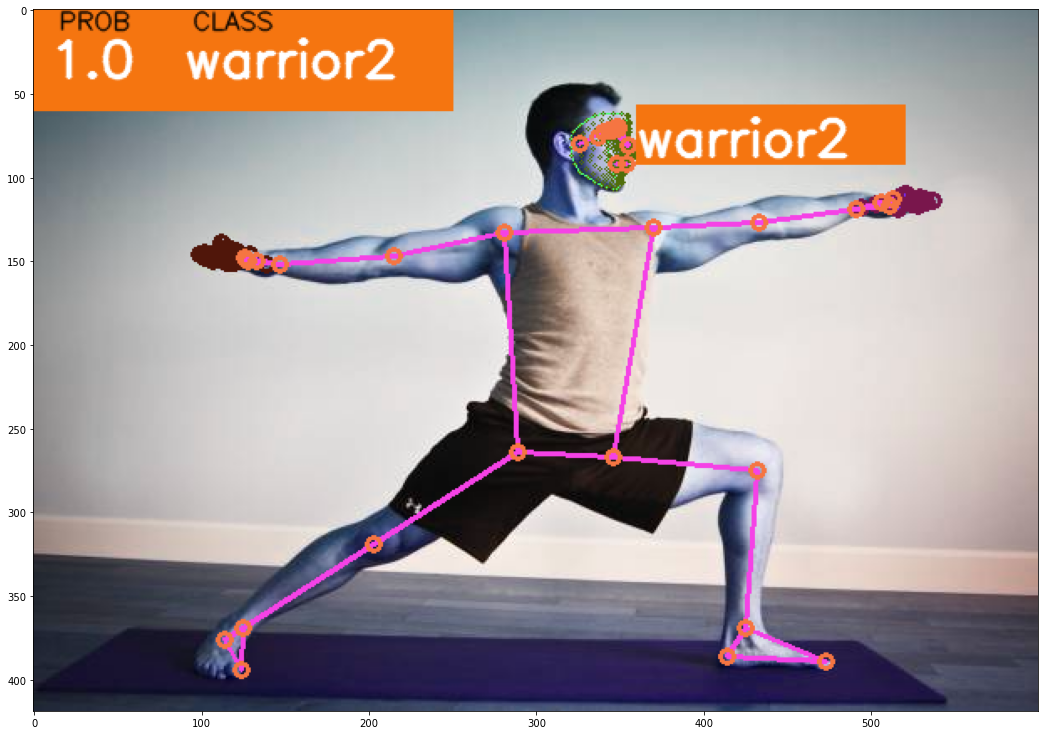

In [52]:
class_name = "warrior2"
frame = cv2.imread(r"C:\Users\KUNAL\Documents\Pose_Detection\Test\warrior2\00000018.jpg")
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Recolor Feed -  converting to RGB 
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
 
    # Make Detections
    results = holistic.process(image)
    #print(results.face_landmarks)
    
    # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        # Recolor image back to BGR for rendering
    image =  cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    
    # 1. Draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    
    # 2. Right hand
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

    # 3. Left Hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

    # 4. Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    
    # Export Co-ordinates
    try:
        pose = results.pose_landmarks.landmark
        # Extracting into array
        pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
        
        # Extract Face landmarks
        face = results.face_landmarks.landmark
        face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
        
        # Extract Left Hand landmarks
        left_hand = results.left_hand_landmarks.landmark
        left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand]).flatten())
        
        # Extract Right Hnad landmarks
        right_hand = results.right_hand_landmarks.landmark
        right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand]).flatten())
        
        
        # Concate rows
        row = pose_row
            
        # Append class name 
        #row.insert(0, class_name)
            
        # Export to CSV
        #with open('coords.csv', mode='a', newline='') as f:
             #csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
             #csv_writer.writerow(row) 
     # Make Detections
        X = pd.DataFrame([row])
        body_language_class = model.predict(X)[0]
        body_language_prob = model.predict_proba(X)[0]
        print(body_language_class, body_language_prob)
            
        # Grab ear coords
        coords = tuple(np.multiply(
        np.array(
        (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
        results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
        , [640,480]).astype(int))
            
        cv2.rectangle(image, 
        (coords[0], coords[1]+5), 
        (coords[0]+len(body_language_class)*20, coords[1]-30), 
        (245, 117, 16), -1)
        cv2.putText(image, body_language_class, coords, 
        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        # Get status box
        cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
        # Display Class
        cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        # Display Probability
        cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)        
    
    
    except:
        pass
        cv2.imshow('Raw Webcam Feed', image)
    
    plt.figure(figsize=(18, 14))
    plt.imshow(image)
    cv2.waitKey(0) # the value is in millisecs.if value is 0 then the windows will be open until they are closed
    cv2.destroyAllWindows()
    
    

In [51]:
# Getting the Ear Co-ordinates to find the Ear Landmarks so as to Display Results on side of it.
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(360, 87)

# Thankyou!!